In [17]:
import pandas as pd
import os, glob
import datetime
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')


nse2021holidays = [datetime.date(2022, 1, 26),
                  datetime.date(2022, 3, 1),
                  datetime.date(2022, 3, 18),
                  datetime.date(2022, 4, 14),
                  datetime.date(2022, 4, 15),
                  datetime.date(2022, 5, 3),
                  datetime.date(2022, 8, 9),
                  datetime.date(2022, 8, 15),
                  datetime.date(2022, 8, 31),
                  datetime.date(2022, 10, 5),
                  datetime.date(2022, 10, 24),
                  datetime.date(2022, 10, 26),
                  datetime.date(2022, 11, 8)]


daterange = pd.date_range(start='9/28/2022', end='12/21/2022').date
spot_path = r'D:\Work\Sykes and Ray\NIFTYOptionsData\OptionsData\Nifty'
expiry_path = r'D:\Work\Sykes and Ray\Tick - Date Wise Folders'
thursdays = pd.date_range(start=datetime.date(2022, 9, 29), end=datetime.date(2022, 12, 31), freq='7D').date
index = 1

for date in daterange:
    print(date)
    yearpath = os.path.join(spot_path, str(date.year))
    filename = date.strftime('Data%Y%m%d.csv')
    filepath = os.path.join(yearpath, filename)

    expiry_date_folder = date.strftime('NSE_%Y%m%d')    
    expiry_date_file = os.path.join(os.path.join(expiry_path, expiry_date_folder), 'Options')
    # print(expiry_date_file)
    # print(Path(expiry_date_file).exists())
    # index = daterange.index(date)

    if Path(filepath).exists():
        df = pd.read_csv(filepath)
        spot = df[df.symbol == 'NIFTY']
        # print(spot.columns)
        try:
            tempspot = spot.reset_index().drop(columns=['index', 'date', 'time', 'oi', 'volume'])
            tempspot.set_index('datetime', inplace=True)
            spot = tempspot
        except:
            spot['datetime'] = spot.date + ' ' + spot.time
            spot = spot.reset_index().drop(columns=['index', 'date', 'time', 'oi', 'volume'])
            spot.set_index('datetime', inplace=True)

        try:
            spot.drop(columns=['datetime.1'], inplace = True)
        except:
            spot.drop(columns=['Unnamed: 0'], inplace = True)
            
        # print(spot)

        if date >= thursdays[index-1]:
            index += 1
            next_expiry_date = thursdays[index]
        else:
            next_expiry_date = thursdays[index]
        
        if next_expiry_date in nse2021holidays:
            next_expiry_date = next_expiry_date - datetime.timedelta(days=1)

        if next_expiry_date in nse2021holidays:
            next_expiry_date = next_expiry_date - datetime.timedelta(days=1)

        # print('Current Date - ',date)
        # print('Next Expiry date - ', next_expiry_date)

        next_expipry_file_name = next_expiry_date.strftime('NIFTY%y%m%d')
        next_expipry_file_name = next_expipry_file_name + '*'
        next_expiry_files = glob.glob(os.path.join(expiry_date_file, next_expipry_file_name))
        # print(os.path.join(expiry_date_file, next_expipry_file_name))
        # print(Path(os.path.join(expiry_date_file, next_expipry_file_name)).exists())
        
        # print(len(next_expiry_files))
        if len(next_expiry_files) == 0:
            print('Thursday is holiday')
            print(date)
            print(next_expiry_date)

        OptionsDFLlist = []

        for file in next_expiry_files:
            df = pd.read_csv(file, names = ['date', 'time', 'LTP', 'A', 'B'])
            df.drop(columns=['A', 'B'], inplace=True)
            df['datetime'] = df.date.astype(str) + df.time            
            df.datetime = pd.to_datetime(df.datetime, format='%Y%m%d%H:%M:%S')
            df.set_index('datetime', inplace=True)
            resampledDf = df['LTP'].resample('1Min').ohlc()    
            resampledDf['symbol'] = os.path.split(file)[1][:-4]
            OptionsDFLlist.append(resampledDf)

        OptionsDFLlist.append(spot)
        OptionsDF = pd.concat(OptionsDFLlist)
        OptionsDF = OptionsDF.ffill(axis=0)
        # print(OptionsDF)
        newfolderpath = r'D:\Work\Sykes and Ray\NIFTYOptionsData\Next Week Exp and Current Spot\2022'
        newfilepath = os.path.join(newfolderpath, filename)
        
        OptionsDF.to_csv(newfilepath)

        # print(spot)
    
    # except:
    #     pass

    # Get spot data
    # Get next week expiry data of all strikes
    # combine the two
    # 


2022-09-28
2022-09-29
2022-09-30
2022-10-01
2022-10-02
2022-10-03
2022-10-04
2022-10-05
2022-10-06
2022-10-07
2022-10-08
2022-10-09
2022-10-10
2022-10-11
2022-10-12
2022-10-13
2022-10-14
2022-10-15
2022-10-16
2022-10-17
2022-10-18
2022-10-19
2022-10-20
2022-10-21
2022-10-22
2022-10-23
2022-10-24
2022-10-25
2022-10-26
2022-10-27
2022-10-28
2022-10-29
2022-10-30
2022-10-31
2022-11-01
2022-11-02
2022-11-03
2022-11-04
2022-11-05
2022-11-06
2022-11-07
2022-11-08
2022-11-09
2022-11-10
2022-11-11
2022-11-12
2022-11-13
2022-11-14
2022-11-15
2022-11-16
2022-11-17
2022-11-18
2022-11-19
2022-11-20
2022-11-21
2022-11-22
2022-11-23
2022-11-24
2022-11-25
2022-11-26
2022-11-27
2022-11-28
2022-11-29
2022-11-30
2022-12-01
2022-12-02
2022-12-03
2022-12-04
2022-12-05
2022-12-06
2022-12-07
2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12
2022-12-13
2022-12-14
2022-12-15
2022-12-16
2022-12-17
2022-12-18
2022-12-19
2022-12-20
2022-12-21


In [14]:
df = pd.read_csv(r"D:\Work\Sykes and Ray\NIFTYOptionsData\OptionsData\Nifty\2022\Data20220928.csv")
df.head()

,Unnamed: 0,close,date,high,low,oi,open,symbol,time,volume
0,0,6926.15,2022-09-28,6926.15,6926.15,2400.0,6926.15,NIFTY29SEP2210000CE,13:40:00,51
1,1,6937.75,2022-09-28,6937.75,6931.55,2450.0,6931.55,NIFTY29SEP2210000CE,13:43:00,100
2,2,6937.75,2022-09-28,6937.75,6937.75,2450.0,6937.75,NIFTY29SEP2210000CE,13:47:00,100
3,3,6977.55,2022-09-28,6977.55,6977.55,2450.0,6977.55,NIFTY29SEP2210000CE,14:19:00,100
4,4,6960.00,2022-09-28,6960.00,6960.00,2450.0,6960.00,NIFTY29SEP2210000CE,14:20:00,50


In [ ]:
['January 26, 2021',
'March 11, 2021',
'March 29, 2021',
'April 02, 2021',
'April 14, 2021',
'April 21, 2021',
'May 13, 2021',
'July 21, 2021',
'August 19, 2021',	
'September 10, 2021',
'October 15, 2021',
'November 04, 2021',
'November 05, 2021',
'November 19, 2021']

In [ ]:
for s in range(startstrike, endstrike, inc):
    exp = atom.GetExpiry(masterdf, symbol)
    opsymbol = symbol + exp + str(s) + optype       
    currprice = atom.GetOptionPrice(masterdf, opsymbol, time, OHLC)
    if abs(currprice - premium) < minval:
        minval = abs(currprice - premium)
        currbeststrike = s

In [ ]:
for date in daterange:
    newfolderpath = r'D:\Work\Sykes and Ray\Aman Backtest'
    filename = date.strftime('Data%Y%m%d.csv')
    newfilepath = os.path.join(newfolderpath, filename)
    df = pd.read_csv(newfilepath)
    
    

In [5]:
import datetime

nse2022holidays = ['January 26, 2021',
'March 11, 2021',
'March 29, 2021',
'April 02, 2021',
'April 14, 2021',
'April 21, 2021',
'May 13, 2021',
'July 21, 2021',
'August 19, 2021',	
'September 10, 2021',
'October 15, 2021',
'November 04, 2021',
'November 05, 2021',
'November 19, 2021']
nse2021holidays = []

for date in nse2022holidays:
    DATE = datetime.datetime.strptime(date, '%B %d, %Y')
    nse2021holidays.append(DATE.date())

nse2021holidays

[datetime.date(2021, 1, 26),
 datetime.date(2021, 3, 11),
 datetime.date(2021, 3, 29),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 4, 14),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 5, 13),
 datetime.date(2021, 7, 21),
 datetime.date(2021, 8, 19),
 datetime.date(2021, 9, 10),
 datetime.date(2021, 10, 15),
 datetime.date(2021, 11, 4),
 datetime.date(2021, 11, 5),
 datetime.date(2021, 11, 19)]

In [37]:
thursdays = pd.date_range(start=datetime.date(2022, 1, 6), end=datetime.date(2022, 12, 31), freq='7D').date
# print(type(thursdays))
# for thursday in thursdays:
#     print(thursdays.index(thursday))
thursdays[-1]

datetime.date(2022, 12, 29)

In [9]:
import datetime
import math

# CurrentTime = datetime.datetime.today().time()
# while True:
#         TimeDelta = CurrentTime - datetime.datetime.today().time()
#         if TimeDelta == 2:
#                 print(TimeDelta)
#                 print('yay')

market_start_time = datetime.time(9, 14)
NotificationEvery = 2
resample_counter = 0


In [ ]:

while True:
    CurrentTime = datetime.datetime.today().time()
    Delta = CurrentTime.hour*60 + CurrentTime.minute - market_start_time.hour*60 - market_start_time.minute

    if (math.floor(Delta/NotificationEvery) >  resample_counter) :
        resample_counter = math.floor(Delta/NotificationEvery)
        print(resample_counter)
        print('yay')
        print(Delta)


In [1]:
import yfinance as yf
import pandas as pd
import datetime
import numpy as np

In [2]:
sgx = yf.Ticker('SGX')
dji = yf.Ticker('^DJI')
nasdaq = yf.Ticker('^IXIC')
nifty = yf.Ticker('^NSEI')

In [3]:
sgxdf = sgx.history(period='max')
djidf = dji.history(period='max')
nasdaqdf = nasdaq.history(period='max')
niftydf = nifty.history(period='max')

In [4]:
djidf = djidf.reset_index()
djidf['date'] = djidf['Date'].dt.date
djidf = djidf.set_index('date')
djidf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,,
1992-01-02,1992-01-02 00:00:00-05:00,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0.0,0.0
1992-01-03,1992-01-03 00:00:00-05:00,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0.0,0.0
1992-01-06,1992-01-06 00:00:00-05:00,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0.0,0.0
1992-01-07,1992-01-07 00:00:00-05:00,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0.0,0.0
1992-01-08,1992-01-08 00:00:00-05:00,3204.800049,3229.199951,3185.820068,3203.899902,29040000,0.0,0.0


In [11]:
import mibian

In [43]:
djdf = djidf[djidf.index.isin(niftydf.index.date)]
djdf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2007-09-17,2007-09-17 00:00:00-04:00,13441.950195,13451.540039,13362.370117,13403.419922,169710000,0.0,0.0
2007-09-18,2007-09-18 00:00:00-04:00,13403.179688,13739.959961,13403.179688,13739.389648,277620000,0.0,0.0
2007-09-19,2007-09-19 00:00:00-04:00,13740.610352,13867.500000,13739.879883,13815.559570,276590000,0.0,0.0
2007-09-20,2007-09-20 00:00:00-04:00,13813.519531,13822.139648,13741.009766,13766.700195,200880000,0.0,0.0
2007-09-21,2007-09-21 00:00:00-04:00,13768.330078,13877.169922,13768.250000,13820.190430,419390000,0.0,0.0


In [44]:
niftydf = niftydf.reset_index()
niftydf['date'] = niftydf['Date'].dt.date
niftydf = niftydf.set_index('date')
niftydf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2007-09-17,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19,2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20,2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21,2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0


In [49]:
niftydf['1'] = np.where(niftydf.Open < niftydf.Close, 1, -1)
niftydf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1
date,,,,,,,,,
2007-09-17,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0,-1
2007-09-18,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0,1
2007-09-19,2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0,1
2007-09-20,2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0,1
2007-09-21,2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0,1


In [51]:
djdf['2'] = np.where(djdf.Open < djdf.Close, 1, -1)
djdf.head()

C:\Users\shubh\AppData\Local\Temp\ipykernel_17736\1838985657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djdf['2'] = np.where(djdf.Open < djdf.Close, 1, -1)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,2
date,,,,,,,,,
2007-09-17,2007-09-17 00:00:00-04:00,13441.950195,13451.540039,13362.370117,13403.419922,169710000,0.0,0.0,-1
2007-09-18,2007-09-18 00:00:00-04:00,13403.179688,13739.959961,13403.179688,13739.389648,277620000,0.0,0.0,1
2007-09-19,2007-09-19 00:00:00-04:00,13740.610352,13867.500000,13739.879883,13815.559570,276590000,0.0,0.0,1
2007-09-20,2007-09-20 00:00:00-04:00,13813.519531,13822.139648,13741.009766,13766.700195,200880000,0.0,0.0,-1
2007-09-21,2007-09-21 00:00:00-04:00,13768.330078,13877.169922,13768.250000,13820.190430,419390000,0.0,0.0,1


In [60]:
finaldf = niftydf['1'] + djdf['2']
finaldf[finaldf == 0].count()

1654

In [37]:
import datetime
import atomic as atom
import definitions as defs
from pathlib import Path
import pandas as pd
import strategies
import reporting as rep
import generalconfigs as genconfigs
import positionconfigs as posconfings
import warnings

warnings.filterwarnings("ignore")

user = "SD"

if user == "SD":
  Root = "D:/Work/Sykes and Ray/"
  Result_path = "D:/Work/Sykes and Ray/NIFTYOptionsData/OptionsData/Results/"
elif user == "RI":
  Root = "../"
  Result_path = "Results/"


Banknifty_Path = Root + "NIFTYOptionsData/OptionsData/Banknifty/"
Nifty_Path = Root + "NIFTYOptionsData/OptionsData/Nifty/"
Finnifty_Path = Root + "NIFTYOptionsData/Resampled Data/Finnifty/"

year = 2023

start_date = datetime.date(year, 3, 16)
end_date = datetime.date(year, 3, 16)
delta = datetime.timedelta(days=1)

approach = 'OLT BN'
EnterTimes = [datetime.time(9, 20), datetime.time(10, 30), datetime.time(11, 15), datetime.time(13, 15), datetime.time(14, 15) ]

PNLLimit = -10000
DrawdownLimit = -10000
start_dateBN = start_date
generalconfig = genconfigs.GetGeneralConfigIntradayTime(EnterTimes, datetime.time(15, 20), defs.ONELEG, defs.ONELEG, defs.BN, 60, defs.YES, PNLLimit, DrawdownLimit)

SLArrBN = [90, 100, 90, 90, 60]

if (generalconfig["symbol"] == defs.BN):
  SLArr = SLArrBN
  Delta = 0
else:
  SLArr = SLArrN
  Delta = 0
positionconfigsOther = []
for SL in SLArr:
  positionconfig = posconfings.getStrangles(defs.SELL, Delta, defs.YES, defs.NO, SL, 50)
  positionconfigsOther.append(positionconfig)
positionconfigsThu = []
for SL in SLArr:
  positionconfig = posconfings.getStraddles(defs.SELL, defs.YES, defs.NO, SL, 50)
  positionconfigsThu.append(positionconfig)

trade = pd.DataFrame()
trades = pd.DataFrame()

while start_dateBN <= end_date:
  date_string = start_dateBN.strftime("%Y/Data%Y%m%d.csv")
  BNPath = Banknifty_Path + date_string
  NPath = Nifty_Path + date_string
  my_fileN = Path(NPath)
  my_fileBN = Path(BNPath)
  print(date_string)
  if start_dateBN.weekday() == defs.THU:
    positionconfigs = positionconfigsThu
  else:
    positionconfigs = positionconfigsOther
  if my_fileN.exists() and my_fileBN.exists():
    masterdfN = atom.LoadDF(NPath)
    masterdfBN = atom.LoadDF(BNPath)
    if (generalconfig["symbol"] == defs.BN):
      (trade, PNLTracker, PNLTrackerSumm) = strategies.IntradayTimeReEntry(masterdfBN, generalconfig, positionconfigs)
    elif (generalconfig["symbol"] == defs.N):
      (trade, PNLTracker, PNLTrackerSumm) = strategies.IntradayTimeReEntry(masterdfN, generalconfig, positionconfigs)
    if (len(trade) > 0):
      trades = trades.append(trade)
    print("MinPNL = " + str(PNLTrackerSumm["MinPNL"]) + ", MaxPNL = " + str(
      PNLTrackerSumm["MaxPNL"]) + ", FinalPNL = " + str(PNLTrackerSumm["FinalPNL"]))
  start_dateBN += delta

trades['date'] = pd.to_datetime(trades["date"])
trades = trades.reset_index()
trades = trades.drop(["index"],axis = 1)

Daily_Chart = rep.GetDailyChart(trades)
report = rep.Report(trades, Daily_Chart)

print(report)

2023/Data20230316.csv
MinPNL = -9572.5807125, MaxPNL = 838.5499999999986, FinalPNL = -8999.9807125
        Overall Profit  Avg Expiry Profit  Avg Day Profit   Max Profit  \
Option    -8999.980713                NaN    -8999.980713 -8999.980713   

           Max Loss  Total Expiries  Win% Trades  Loss% Trades  Win% Days  \
Option -8999.980713               0         0.25          0.75        0.0   

        Loss% Days  ...  Avg Loss On Loss Days  Max Drawdown(MDD)  \
Option         1.0  ...           -8999.980713                0.0   

        Return to MDD Ratio  Expectancy  0 SL/TP Hit Count  1 SL/TP Hit Count  \
Option                 -inf   -0.565595                  0                  0   

        2 SL/TP Hit Count  Max_Winning_Streak  Max_Losing_Streak  Lot Size  
Option                  0                 NaN                  4         2  

[1 rows x 23 columns]


<Axes: xlabel='Time'>

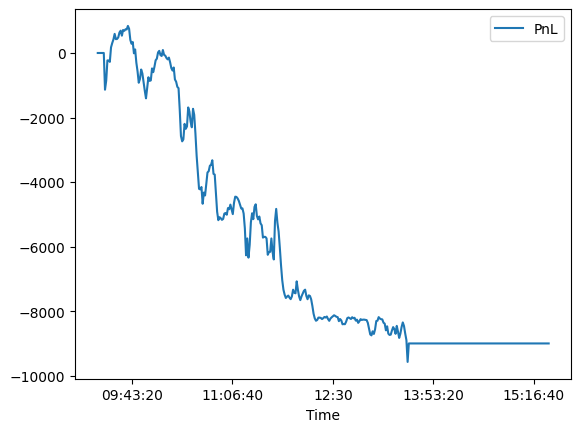

In [42]:
PNLTrackerDF = pd.DataFrame(PNLTracker.items(), columns=['Time', 'PnL'])
PNLTrackerDF = PNLTrackerDF.set_index('Time')
PNLTrackerDF.plot()

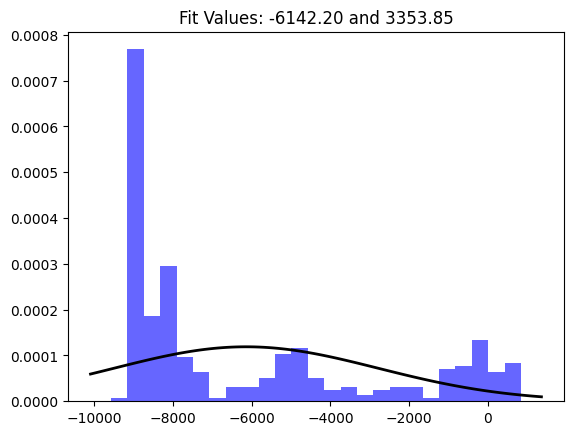

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as stats
import numpy as np

mu, std = norm.fit(PNLTrackerDF.PnL)

plt.hist(PNLTrackerDF.PnL, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

In [40]:
StandardPNLTrackerDF = (PNLTrackerDF - mu)/std 


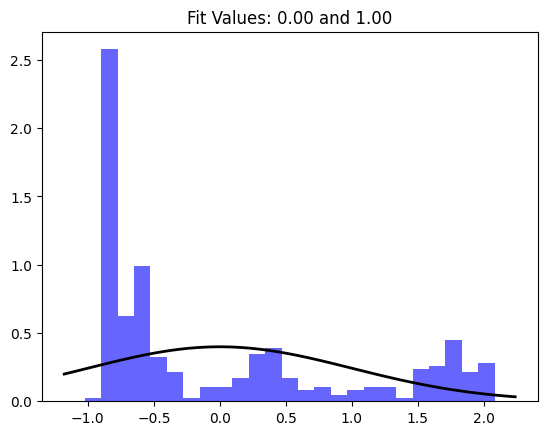

In [41]:
mu, std = norm.fit(StandardPNLTrackerDF.PnL)

plt.hist(StandardPNLTrackerDF.PnL, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()